In [74]:
import pandas as pd
from glob import glob
import re
import math
import numpy as np
import torch
import torchvision

from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import display # to display images

In [75]:
# data = load_data('results/default_pytorch_finetuned/results.txt')
# print(data['off_sqrt'].sum(), data['off'].mean())

# data = load_data('results/cropped_results_huge/results.txt')
# print(data['off_sqrt'].sum(), data['off'].mean())

# data = load_data('results/cropped_results_big/results.txt')
# print(data['off_sqrt'].sum(), data['off'].mean())

# data = load_data('results/cropped_results/results.txt')
# print(data['off_sqrt'].sum(), data['off'].mean())

# data = load_data('results/cropped_results_small/results.txt')
# print(data['off_sqrt'].sum(), data['off'].mean())

data/TUBCrowdFlow/images/IM05/frame_0037.png data/TUBCrowdFlow/images/IM05/frame_0037/density_fixed-8.npy


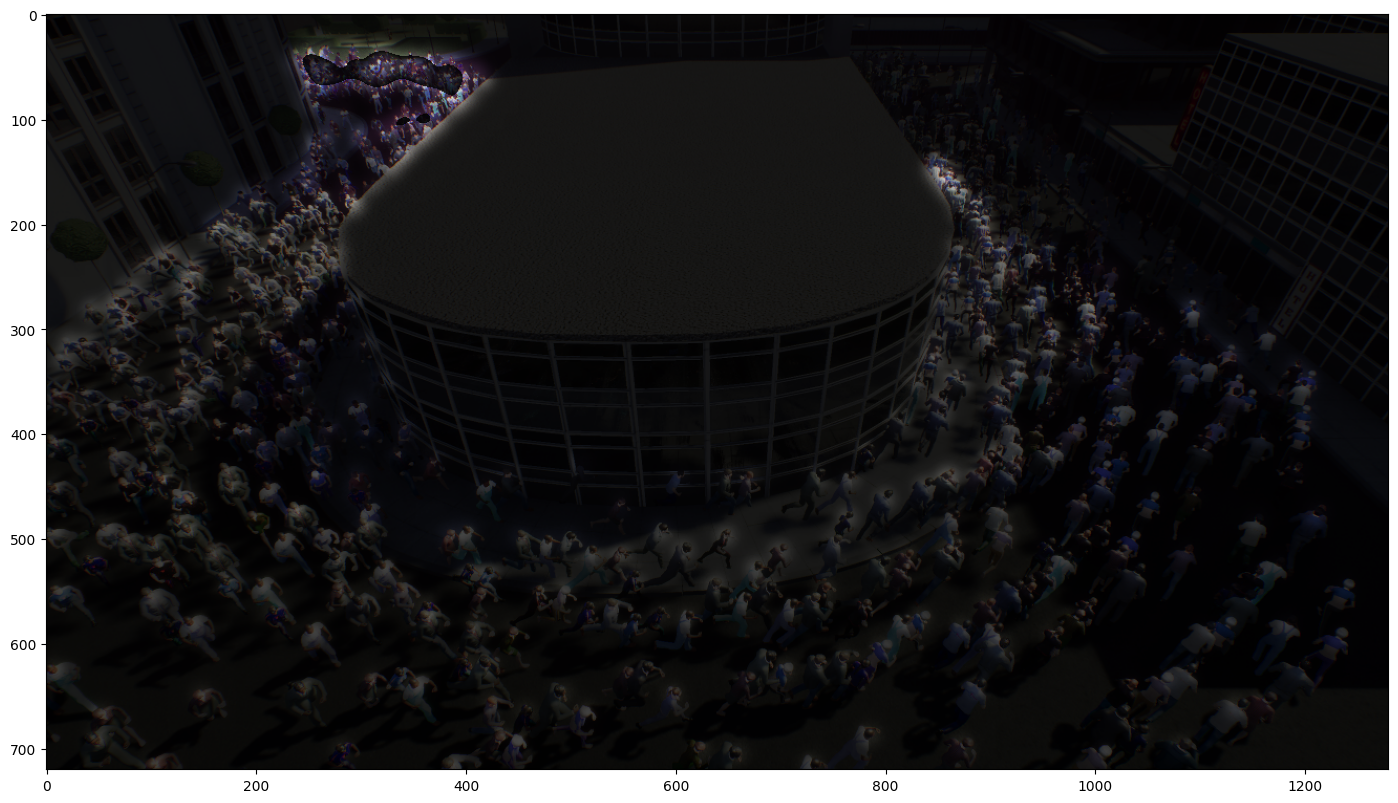

In [138]:
for i, frame in enumerate(glob('data/TUBCrowdFlow/images/IM05/*/')):
    if i < 100:
        continue
        
    orig = glob(frame[:-1]+'.*')[0]
    dense = frame+'density_fixed-8.npy'
    print(orig, dense)
    
    density = np.load(dense)
    density_img = Image.fromarray(density)
    
    fig = plt.figure(figsize=(18,10), dpi= 100, facecolor='w', edgecolor='k')
    
    cc_img = np.zeros((density.shape[0], density.shape[1], 4))
    cc_img = cc_img.astype(np.uint8)
    cc_img[:, :, 3] = 255 - (density * 255.0 / (density.max()/2))
    cc_img[cc_img > 2] = cc_img[cc_img > 2] * 0.9
    cc_img = Image.fromarray(cc_img, 'RGBA')
    
    img = Image.open(orig, 'r').convert('RGBA')
    
    imshow(np.asarray(Image.alpha_composite(img, cc_img)))
    
#     fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
#     imshow(np.asarray(img))
    
    break

In [139]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [145]:
class AverageContainer:
    def __init__(self):
        self.meters = {}
        
    def __getitem__(self, item):
        if item not in self.meters:
            self.meters[item] = AverageMeter()
        return self.meters[item]
        
    def reset(self):
        self.meters = {}

In [146]:
container = AverageContainer()
container['testing'].update(2)
container['testing'].avg

2.0